In [1]:
#Imports
import pandas as pd
import snscrape.modules.twitter as sntwitter

In [2]:
#Initialize Tweet List
fake_vac_tweets_list = []
funny_tweet_list = []

In [3]:
#Pull tweets from Twitter API that contain "Fake vaccinations" in text of post
for i, tweet in enumerate(sntwitter.TwitterSearchScraper('Fake vaccinations').get_items()):
    if i > 999:
        break
    fake_vac_tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.replyCount, tweet.retweetCount])

In [4]:
#Create DataFrame
fake_vac_df = pd.DataFrame(fake_vac_tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Reply Count', 'Retweet Count'])

In [5]:
#Convert Text column to lowercase for searching purposes
fake_vac_df['Text'] = fake_vac_df['Text'].str.lower()

In [6]:
#Calculate number of tweets containg various words
fear_num = fake_vac_df['Text'][fake_vac_df['Text'].str.contains('fear')==True].count()
hoax_num = fake_vac_df['Text'][fake_vac_df['Text'].str.contains('hoax')==True].count()
microchip_num = fake_vac_df['Text'][fake_vac_df['Text'].str.contains('microchip')==True].count()
conspiracy_num = fake_vac_df['Text'][fake_vac_df['Text'].str.contains('conspiracy')==True].count()
gates_num = fake_vac_df['Text'][(fake_vac_df['Text'].str.contains('bill gates')==True)].count()

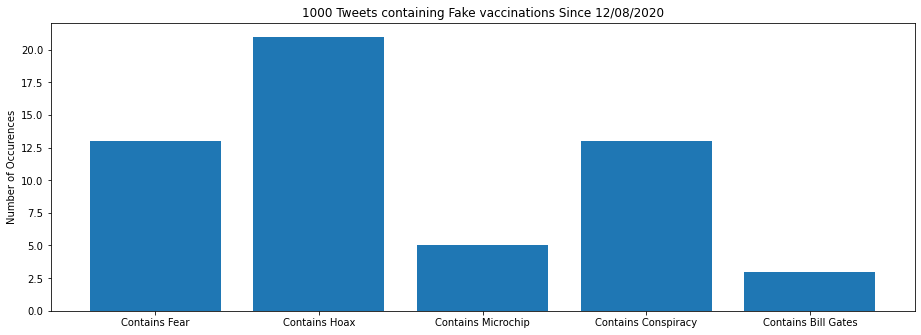

In [257]:
#Create bargraph
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,1,2,1])
ax.set_title('1000 Tweets containing Fake vaccinations Since 12/08/2020')
ax.set_ylabel('Number of Occurences')
labels = ['Contains Fear', 'Contains Hoax', 'Contains Microchip', 'Contains Conspiracy', 'Contains Bill Gates']
count_tweets = [fear_num, hoax_num, microchip_num, conspiracy_num, gates_num]
ax.bar(labels,count_tweets)
plt.show()

# Fuzzy Matching Stuff

In [9]:
#Install fuzztwuzzy 
pip install fuzzywuzzy

SyntaxError: invalid syntax (<ipython-input-9-c2f6b963bff0>, line 2)

In [10]:
#Imports
from fuzzywuzzy import fuzz

In [11]:
#Method to determine if fuzzymatch or not
def fuzzy_match(str1: str, str2: str) -> bool:
    token_set_ratio = fuzz.token_set_ratio(str1, str2)
    if str2 in str1:
        return True
    if token_set_ratio > 55:
        return True
    else:
        return False

In [12]:
#Calculate number of tweets containg various words
#Should pass String comparing to in lower case because made all entries in Text column lowercase
fear_num = fake_vac_df['Text'][fake_vac_df['Text'].apply(lambda str1: fuzzy_match(str1, 'fear'))==True].count()
hoax_num = fake_vac_df['Text'][fake_vac_df['Text'].apply(lambda str1: fuzzy_match(str1, 'hoax'))==True].count()
microchip_num = fake_vac_df['Text'][fake_vac_df['Text'].apply(lambda str1: fuzzy_match(str1, 'microchip'))==True].count()
conspiracy_num = fake_vac_df['Text'][fake_vac_df['Text'].apply(lambda str1: fuzzy_match(str1, 'conspiracy'))==True].count()
gates_num = fake_vac_df['Text'][fake_vac_df['Text'].apply(lambda str1: fuzzy_match(str1, 'bill gates'))==True].count()
funny_tweet_list.append(fake_vac_tweets_list[212])

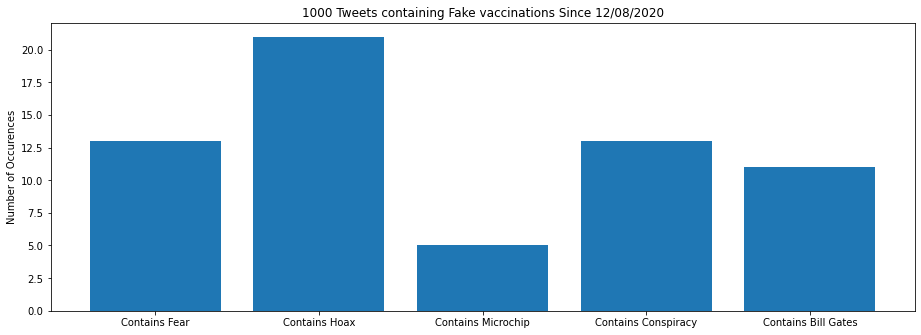

In [261]:
#Create bargraph
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,1,2,1])
ax.set_title('1000 Tweets containing Fake vaccinations Since 12/08/2020')
ax.set_ylabel('Number of Occurences')
labels = ['Contains Fear', 'Contains Hoax', 'Contains Microchip', 'Contains Conspiracy', 'Contains Bill Gates']
count_tweets = [fear_num, hoax_num, microchip_num, conspiracy_num, gates_num]
ax.bar(labels,count_tweets)
plt.show()

## Tweet List At Momment

In [13]:
#Prints out tweets in list
for entry in funny_tweet_list:
    print(entry)
    print()

[datetime.datetime(2021, 1, 3, 13, 47, 17, tzinfo=datetime.timezone.utc), 1345728441585463296, "@realDonaldTrump @CDCgov WHY ARE YOU ENCOURAGING MILLIONS OF PEOPLE WHO TRUST YOU AND VOTED FOR YOU TO TAKE POISON 'VACCINATIONS' THAT EVEN PELOSI AND BIDEN FAKE OUT TAKE IT???? YOU KNOW EXACTLY WHAT GATES IS DOING AND ARE BEING SILENT!  I WANT AN ANSWER!", 'NaomiHu00105192', 0, 0]

[datetime.datetime(2020, 12, 18, 2, 48, 31, tzinfo=datetime.timezone.utc), 1339764452925665282, "@ashleykingsley @KnightroGlisten Frankly it's difficult to draw other conclusions when people spread things like this as complete dis-information.  Why try to make people fear vaccinations with a bogus anecdote like this?  I don't care if you don't want to take it, but don't spread fake or dishonest propaganda.", 'JamesSeldon', 2, 0]

